<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day3_CNN_for_stress_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Essential Libraries and Packages

In [0]:
!pip install scikit-plot

In [2]:
import scipy.io
from scipy.signal import butter, lfilter
from tensorflow import keras
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from keras.utils import to_categorical 

Using TensorFlow backend.


# Data Accessing in Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# How to save a trained model
# new_model = keras.models.load_model('/content/drive/My Drive/malaysia /summer/filte/my_model.h5')


# Loading trained Model
new_model = keras.models.load_model('/content/drive/My Drive/data/my_model.h5')

In [5]:
# Checking Model properties/ description

new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 17, 18, 16)        160       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 15, 16)        0         
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 15, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 14, 10)        650       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 13, 10)        410       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 12, 10)       

In [0]:
# Setting our working directory for loading data

data_directory = "/content/drive/My Drive/data"

testing_file = "testing_data.mat" # Testing Data (Signals) 
testing_labels = "testing_labels.mat" # Testing Labels of Signals Windows


# Concatenating File Path with File Name for loading
testing_data_path = os.path.join(data_directory,testing_file)
testing_labels_path = os.path.join(data_directory,testing_labels)


# Loading Data (Testing Data)
testing_data = scipy.io.loadmat(testing_data_path)
testing_labels = scipy.io.loadmat(testing_labels_path)

In [0]:
# The data is in the form of a dictionary. 

testing_data = testing_data['test_x']
testing_labels = testing_labels['test_y']

# Data Transformation for CNN

In [0]:
test_x = np.reshape(testing_data, (int(len(testing_data[1,:])/20), 19, 20, 1))

In [0]:
testing_label = to_categorical(testing_labels,2)

In [33]:
# Evaluating Testing data with loaded Model 
test_eval = new_model.evaluate(test_x, testing_label, verbose=1)

90000/90000 [==============================] - 22s 244us/sample - loss: 1.0355 - acc: 0.8174


In [0]:
y_pred = new_model.predict(test_x)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(testing_label, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     84565
           1       0.07      0.16      0.10      5435

    accuracy                           0.82     90000
   macro avg       0.50      0.51      0.50     90000
weighted avg       0.89      0.82      0.85     90000



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


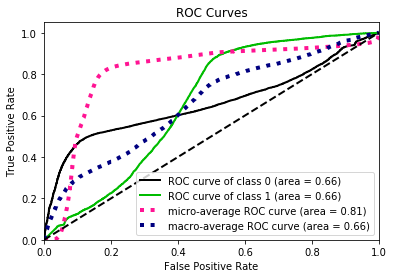

In [42]:
# Plot roc curve
import scikitplot as skplt

skplt.metrics.plot_roc_curve(np.argmax(testing_label, axis=1), y_pred)
plt.show()